**Univariate Linear Regression**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
plt.rcParams["figure.figsize"] = (12, 12)

In [ ]:
temprature_data = pd.read_csv("sample_data/temprature_summary.csv")

In [ ]:
temprature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   MaxTemp   119040 non-null  float64
 1   MinTemp   119040 non-null  float64
 2   MeanTemp  119040 non-null  float64
dtypes: float64(3)
memory usage: 2.7 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb48aae6c10>,
      dtype=object)

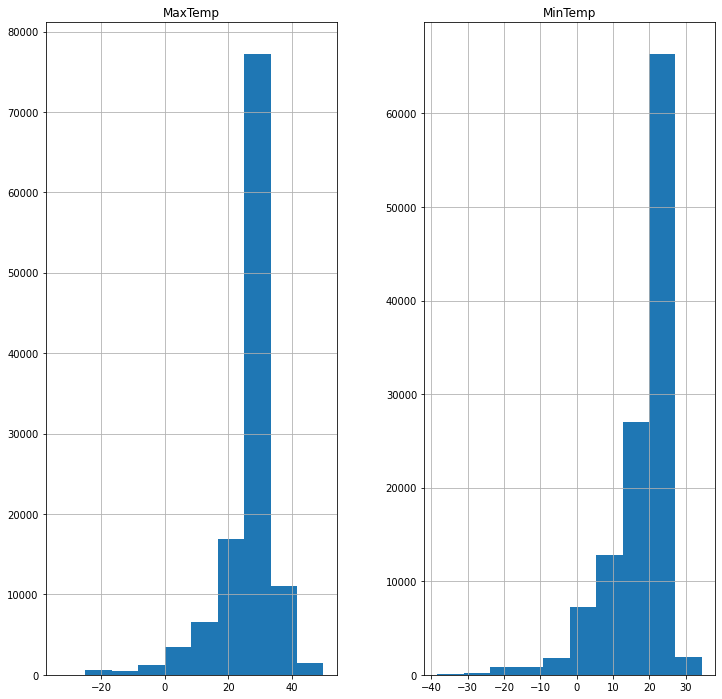

In [ ]:
temprature_data[["MaxTemp", "MinTemp"]].hist()

In [ ]:
# temprature_data[["MinTemp", "MaxTemp"]][100000:].plot(x='MinTemp', y='MaxTemp', kind='scatter')

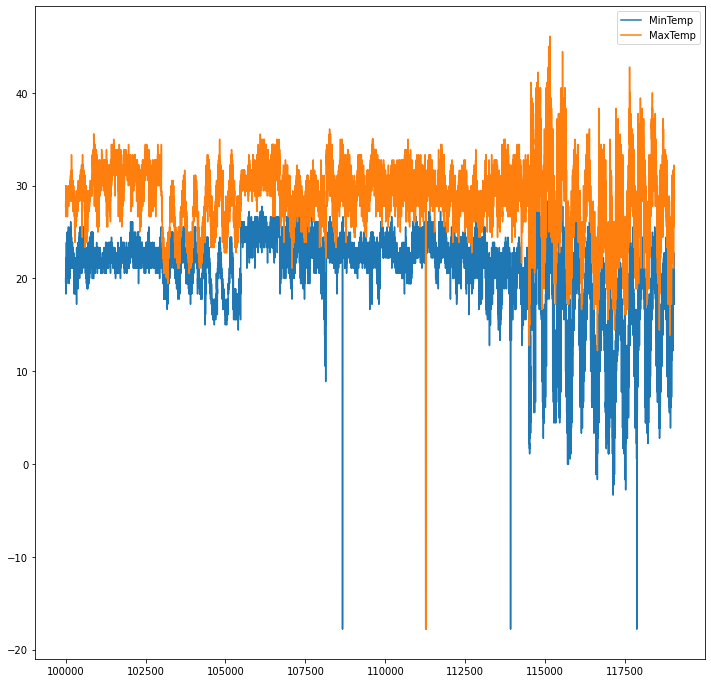

In [ ]:
temprature_data[["MinTemp", "MaxTemp"]][100000:].plot(kind='line')

In [ ]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

In [ ]:
temprature_data_std = z_score(temprature_data)

In [ ]:
temprature_data['MaxTemp'] = temprature_data['MaxTemp'].apply(lambda tempValue: 1 if tempValue == 0 else tempValue)
temprature_data['MinTemp'] = temprature_data['MinTemp'].apply(lambda tempValue: 1 if tempValue == 0 else tempValue)

In [ ]:
preprocessed_data = temprature_data

In [ ]:
train_size = int(preprocessed_data.shape[0]*(50/100))

train_X = preprocessed_data[["MinTemp"]][:train_size]
train_Y = preprocessed_data[["MaxTemp"]][:train_size]
test_X = preprocessed_data[["MinTemp"]][train_size:]
test_Y = preprocessed_data[["MaxTemp"]][train_size:]

In [ ]:
def getSlopeIntercept(input_feature, output):
  Xi = input_feature
  Yi = output
  N = len(Xi)

  Xi_mean = Xi.mean()
  Yi_mean = Yi.mean()

  S_YiXi = (Yi*Xi).sum()
  Yi_Xi_ByN = (Yi.sum()*Xi.sum())/N

  S_XiXi = (Xi*Xi).sum()
  Xi_Xi_ByN = (Xi.sum()*Xi.sum())/N

  slope = (S_YiXi - Yi_Xi_ByN)/(S_XiXi - Xi_Xi_ByN)

  intercept = Yi_mean - slope * Xi_mean

  return (intercept, slope)

b0, b1 = getSlopeIntercept(train_X['MinTemp'], train_Y['MaxTemp'])

print(f'beta: {b1}, alpha: {b0}')

beta: 0.9960468729983254, alpha: 8.410188482438635


In [ ]:
def getMAPE(test_Y, y_prediction):
  result = ((y_prediction - test_Y)/test_Y).abs().sum()
  result /= test_Y.size
  result *= 100
  return result

def test(test_X, test_Y, b0, b1):
  y_prediction = b0 + b1*test_Y
  # accuracy = 100 - mean_absolute_percentage_error(test_Y, y_prediction)
  accuracy = 100 - getMAPE(test_Y, y_prediction)
  return accuracy
  # return np.sqrt(mean_squared_error(test_Y, y_prediction))

In [ ]:
accuracy = test(test_X['MinTemp'], test_Y['MaxTemp'], b0, b1)
accuracy

65.34797370854508

In [ ]:
# Using library
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

model = lm.fit(train_X, train_Y)

model.intercept_
model.coef_
predicted_Y = model.predict(test_X)

accuracy = 100 - getMAPE(test_Y, predicted_Y)

print(accuracy)

MaxTemp    85.388524
dtype: float64


Text(0, 0.5, 'Maximum Temprature')

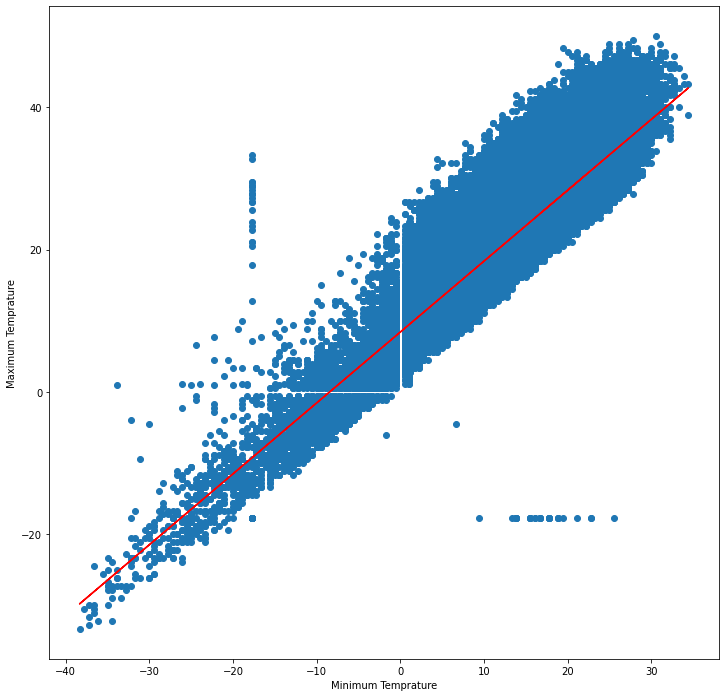

In [ ]:
plot_example_size = preprocessed_data.shape[0]

line_X = preprocessed_data[:plot_example_size]['MinTemp'].values
line_Y = b0 + b1*line_X
plt.scatter(x=line_X, y=preprocessed_data[:plot_example_size]['MaxTemp'].values, color='#1f77b4')
plt.plot(line_X, line_Y, 'r')
plt.xlabel('Minimum Temprature')
plt.ylabel('Maximum Temprature')